<h1>지도학습</h1>

<h2>KNN</h2>

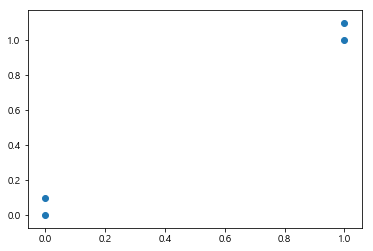

In [0]:
from numpy import *
import operator
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


def createDataSet():
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ["A", "A", "B", "B"]
    return group, labels

group, labels = createDataSet()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(group[:, 0], group[:, 1])
plt.show()

In [0]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat**2
    #print(sqDiffMat)
    sqDistances = sqDiffMat.sum(axis=1)
    #print(sqDistances)
    distances = sqDistances*0.5
    sortedDistlndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        votellabel = labels[sortedDistlndicies[i]]
        classCount[votellabel] = classCount.get(votellabel, 0) +1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [0]:
classify0([0, 0], group, labels, 3)

'B'

In [0]:
def file2matrix(filename):
    love_dictionary = {"largeDoses" : 3, "smallDoses" : 2, "didntLike" : 1}
    fr = open(filename)
    array0Lines = fr.readlines()
    numberOfLines = len(array0Lines)
    returnMat = zeros((numberOfLines, 3))
    classLabelVector = []
    index = 0
    for line in array0Lines:
        line = line.strip()
        listFromLine = line.split("\t")
        returnMat[index, :] = listFromLine[0:3]
        if(listFromLine[-1].isdigit()):
            classLabelVector.append(int(listFromLine[-1]))
        else:
            classLabelVector.append(love_dictionary.get(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector

In [0]:
datingDataMat, datingLabels = file2matrix("l_d/p3/datingTestSet.txt")

In [0]:
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [0]:
datingLabels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

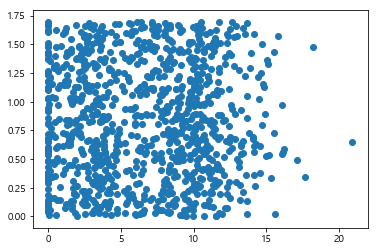

In [0]:
plt.figure()
plt.scatter(datingDataMat[:, 1], datingDataMat[:, 2])
plt.show()

In [0]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m, 1))
    #normDataSet = dataSet - minVals
    normDataSet = normDataSet / tile(ranges, (m, 1))
    #normDataSet = normDataSet / ranges
    return normDataSet, ranges, minVals

In [0]:
normMat, ranges, minVals = autoNorm(datingDataMat)

In [0]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [0]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [0]:
minVals

array([0.      , 0.      , 0.001156])

In [0]:
def datingClassTest():
    hoRatio = 0.10
    datingDataMat, datingLabels = file2matrix("l_d/p3/datingTestSet.txt")
    normMat, rnges, minvals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i, :],
                                     normMat[numTestVecs:m, :],
                                     datingLabels[numTestVecs:m],
                                     3)
        
        if (classifierResult != datingLabels[i]):
            print(f"the classifier came back with:",
            f" {classifierResult}, the real answer is: ",
            f"{datingLabels[i]}")
            errorCount += 1.0
    print(f"the total error rate is : {errorCount / float(numTestVecs)}")
    print(f"the error count : {errorCount}")

In [0]:
datingClassTest()

the classifier came back with:  3, the real answer is:  2
the classifier came back with:  3, the real answer is:  1
the classifier came back with:  3, the real answer is:  1
the classifier came back with:  2, the real answer is:  3
the classifier came back with:  3, the real answer is:  1
the total error rate is : 0.05
the error count : 5.0


In [0]:
def classifyPerson():
    resultList = ["not at all", "in small doses", "in large doses"]
    percentTats = float(input("percentage of time spent playing video games?"))
    ffMiles = float(input("비행기 마일/년"))
    iceCream = float(input("아이스크림 리터 / 년"))
    datingDataMat, datingLabels = file2matrix("l_d/p3/datingTestSet.txt")
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles, percentTats, iceCream,])
    classifierResult = classify0((inArr - minVals) / ranges, normMat, datingLabels, 3)
    print(f"결과 : {resultList[classifierResult - 1]} ")

In [0]:
classifyPerson()

percentage of time spent playing video games? 1
비행기 마일/년 1
아이스크림 리터 / 년 1


결과 : in small doses 


<h2>Decision Tree</h2>



In [0]:
from math import log
import operator

def createDataSet():
    dataSet = [[1, 1, "yes"],
              [1, 1, "yes"],
              [1, 0, "no"],
              [0, 1, "no"],
              [0, 1, "no"]]
    labels = ["no surfacing", "flippers"]
    return dataSet, labels

In [0]:
def calcShannonEnt(dataSet):
    numEntries= len(dataSet)
    labelCounter={}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounter.keys():
            labelCounter[currentLabel] = 0
        labelCounter[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounter:
        prob = float(labelCounter[key]) / numEntries
        #print(prob)
        shannonEnt -= prob * log(prob, 2)
    return shannonEnt

In [0]:
myDat, labels = createDataSet()

In [0]:
calcShannonEnt(myDat)

0.9709505944546686

In [0]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [0]:
#myDat[0][-1] = "maybe"

In [0]:
calcShannonEnt(myDat)

0.9709505944546686

In [0]:
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            print(reducedFeatVec)
            reducedFeatVec.extend(featVec[axis + 1:])
            print(featVec[axis + 1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [10]:
splitDataSet(myDat, 0, 0)

[]
[1, 'no']
[]
[1, 'no']


[[1, 'no'], [1, 'no']]

In [0]:
splitDataSet(myDat, 0, 1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [11]:
splitDataSet(myDat, 1, 0)

[1]
['no']


[[1, 'no']]

In [0]:
splitDataSet(myDat, 1, 1)

[[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']]

In [0]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [0]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
    #print(numFeatures)
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0
    bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet) / float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy
        #print(infoGain)
        if(infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

In [0]:
chooseBestFeatureToSplit(myDat)

0

In [0]:
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [0]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [0]:
def createTree(dataSet, labels):
    #print(dataSet)
    #print("createTree동작")
    
    classList = [example[-1] for example in dataSet]
    print(f"classList : {classList}")
    print(f"classList.count : {classList.count(classList[0])}")
    if classList.count(classList[0]) == len(classList):
        #print("fuck")
        return classList[0]
    if len(dataSet[0]) == 1:
        #print("fuck2")
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    #print(f"myTree : {myTree}")
    #print(f"labels[bestFeat] : {labels[bestFeat]}")
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    #print(f"featValue : {featValues}")
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        #print(f"myTree : {myTree}")
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree

In [0]:
myDat, labels = createDataSet()
createTree(myDat, labels)

classList : ['yes', 'yes', 'no', 'no', 'no']
classList.count : 2
classList : ['no', 'no']
classList.count : 2
classList : ['yes', 'yes', 'no']
classList.count : 2
classList : ['no']
classList.count : 1
classList : ['yes', 'yes']
classList.count : 2


{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [0]:
def retrieveTree(i):
    listOfTrees = [{"no surfacing" : {0 : "no", 1 : {"flippers" : { 0 : "no", 1 : "yes"}}}},
                  {"no surfacing" : {0 : "no", 1 : {"flippers" : {0 : {"head" : {0 : "no", 1 : "yes"}}, 1 : "no"}}}}
                  ]
    return listOfTrees[i]

In [0]:
def classify(inputTree, featLabels, testVec):
    firstStr = list(inputTree)[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    if isinstance(valueOfFeat, dict):
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else:
        classLabel = valueOfFeat
    return classLabel

In [0]:
myTree = retrieveTree(0)

In [0]:
classify(myTree, labels, [1, 0])

'no'

In [0]:
classify(myTree, labels, [1, 1])

'yes'

<h2>Linear Regression</h2>

In [0]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_min = 4
X_max = 30
X_n = 16
X = 5 + 25*np.random.rand(X_n)
Prm_c = [170, 108, 0.2]
T = (Prm_c[0] - Prm_c[1]*np.exp(-Prm_c[2]*X) +
    4*np.random.randn(X_n)
    )
np.savez("ch5_data.npz", X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)

In [0]:
np.round(X, 2)

array([15.43, 23.01,  5.  , 12.56,  8.67,  7.31,  9.66, 13.64, 14.92,
       18.47, 15.48, 22.13, 10.11, 26.95,  5.68, 21.76])

In [0]:
np.round(T, 2)

array([170.91, 160.68, 129.  , 159.7 , 155.46, 140.56, 153.65, 159.43,
       164.7 , 169.65, 160.71, 173.29, 159.31, 171.52, 138.96, 165.87])

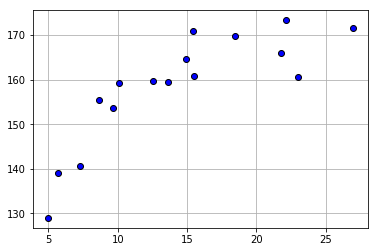

In [0]:
plt.figure()
plt.plot(X, T, marker="o", markeredgecolor="k", color="blue", ls="None")
plt.grid()
plt.show()

In [0]:
from mpl_toolkits.mplot3d import Axes3D

def mse_line(x, t, w):
    y = w[0]*x + w[1]
    mse = np.mean((y - t)**2)
    return mse

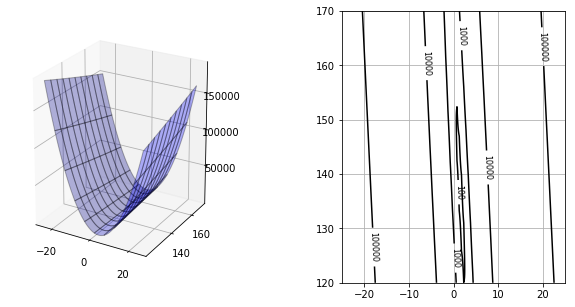

In [0]:
xn = 100
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, projection="3d")
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3, color="blue", edgecolor="k")
ax.set_xticks([-20, 0, 20])
ax.set_yticks([-120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, J, 30, colors="k", levels=[100, 1000, 10000, 100000])
cont.clabel(fmt="%1.0f", fontsize=8)
plt.grid()
plt.show()

In [0]:
def dmse_line(x, t, w):
    y = w[0]*x +w[1]
    d_w0 = 2*np.mean((y - t)*x)
    d_w1 = 2*np.mean(y - t)
    return d_w0, d_w1

In [0]:
d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))

[5046.3  301.8]


In [0]:
def fit_line_num(x, t):
    w_init = [10.0, 165.0]
    alpha = 0.001
    i_max = 100000
    eps = 0.1
    w_i = np.zeros([i_max, 2])
    w_i[0, :] = w_init
    for i in range(1, i_max):
        dmse = dmse_line(x, t, w_i[i - 1])
        w_i[i, 0] = w_i[i - 1, 0] - alpha*dmse[0]
        w_i[i, 1] = w_i[i - 1, 1] - alpha*dmse[1]
        if max(np.absolute(dmse)) < eps:
            break
    w0 = w_i[i, 0]
    w1 = w_i[i, 1]
    w_i = w_i[:i, :]
    return w0, w1, dmse, w_i

반복횟수13820
W=[1.539947, 136.176160]
dMSE=[-0.005794, 0.099991]
MSE=49.027452
[10.          4.95371356  2.4301957  ...  1.53992997  1.53993577
  1.53994156] [165.         164.69820279 164.54258086 ... 136.1764604  136.17636034
 136.17626032]


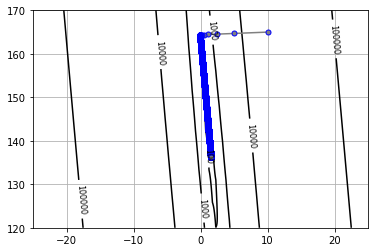

In [0]:
plt.figure()
xn = 100
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
cont = plt.contour(xx0, xx1, J, 30, colors="k", levels=(100, 1000, 10000, 100000))
cont.clabel(fmt="%1.0f", fontsize=8)
plt.grid()
W0, W1, dMSE, W_history = fit_line_num(X, T)
print(f"반복횟수{W_history.shape[0]}")
print(f"W=[{W0:.6f}, {W1:.6f}]")
print(f"dMSE=[{dMSE[0]:.6f}, {dMSE[1]:.6f}]")
print(f"MSE={mse_line(X, T, [W0, W1]):.6f}")
print(W_history[:, 0], W_history[:, 1])
plt.plot(W_history[:, 0], W_history[:, 1], ".-",
        color="gray", markersize=10, markeredgecolor="blue")
plt.show()

In [0]:
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0]*xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), lw=4)

w0=1.540, w1=136.176
SD=7.002


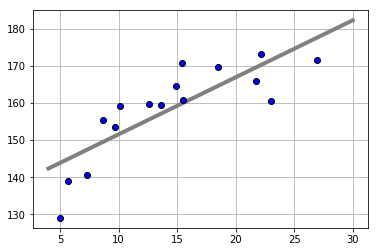

In [0]:
plt.figure()
W = np.array([W0, W1])
mse = mse_line(X, T, W)
print(f"w0={W0:0.3f}, w1={W1:0.3f}")
print(f"SD={np.sqrt(mse):0.3f}")
show_line(W)
plt.plot(X, T, marker="o", ls="", color="blue", markeredgecolor="k")
plt.grid()
plt.show()